# Exemplo de ajuste sináptico

In [1]:
from ipywidgets import interact, interactive
import torch
import matplotlib.pyplot as plt
from functools import partial
import numpy as np

%matplotlib inline

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-1, max=3, color='black', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

Supondo f(x)=x,

y = w1.x1 + w2.x2 - b

fazendo y=0 e reescrevendo para x2 em termos de x1,

x2 = (b - w1.x1)/w2


In [2]:
def coord(w1,w2,b,x1):
  return (b-w1*x1)/w2

In [3]:
def mk_coord(w1, w2, b):
  return partial(coord, w1, w2, b)

In [4]:
# 2 classes
x1, y1 = [1,2],[2,1]
x2, y2 = [0.5, 0],[0.5, 0]

In [5]:
def plot_coord(w1, w2, b):
    plt.figure(2)
    x = np.linspace(0, 3,3)
    plt.scatter(x1,y1, color='blue')
    plt.scatter(x2,y2,color='red')
    plt.plot(coord(w1,w2,b,x),color='black')
    plt.show()

interactive_plot = interactive(plot_coord, w1=0.1, w2=-0.2, b=0.3)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.1, description='w1', max=0.30000000000000004, min=-0.1), FloatSlider…

In [6]:
# implementação no Colab não atualiza gráfico - cria novo
@interact(w1=0.1, w2=-0.2, b=0.3)
def plot_coord(w1, w2, b):
    plt.scatter(x1,y1, color='blue')
    plt.scatter(x2,y2,color='red')
    plot_function(mk_coord(w1,w2,b), ylim=(-3,5))

interactive(children=(FloatSlider(value=0.1, description='w1', max=0.30000000000000004, min=-0.1), FloatSlider…

# Exemplo clássico com o Perceptron

In [7]:
import numpy as np

# classe perceptron

class Perceptron(object):

    def __init__(self, eta=0.01, epocas=50):
        self.eta = eta
        self.epocas = epocas

    def treina(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.erros_ = []

        for _ in range(self.epocas):
            erros = 0
            for xi, target in zip(X, y):
                atualiza = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  atualiza * xi
                self.w_[0] +=  atualiza
                erros += int(atualiza != 0.0)
            self.erros_.append(erros)
        return self

    def entrada(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.entrada(X) >= 0.0, 1, 0)

In [8]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [9]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# setosa e versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# comps sepal e petal
X = df.iloc[0:100, [0,2]].values

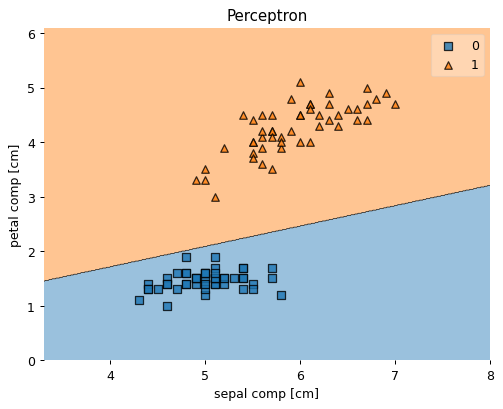

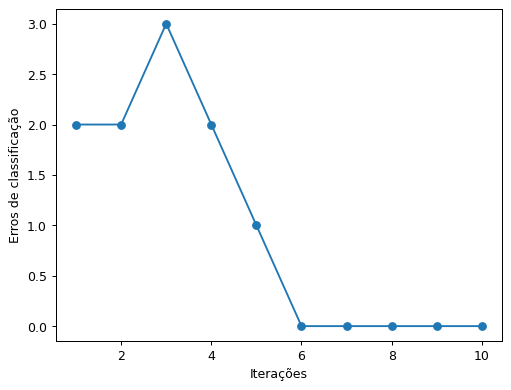

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

rna = Perceptron(epocas=10, eta=0.05)

rna.treina(X, y)
#print(f'Pesos: { ppn.w_}')
plot_decision_regions(X, y, clf=rna)
plt.title('Perceptron')
plt.xlabel('sepal comp [cm]')
plt.ylabel('petal comp [cm]')
plt.show()

plt.plot(range(1, len(rna.erros_)+1), rna.erros_, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Erros de classificação')
plt.show()